In [1]:
os.chdir('../../')
from Classes.Model_Setup.Conversion import *
from Classes.Model_Setup.Model import *
from Classes.Model_Setup.Plot import *
from Classes.Model_Setup.TrainTestSplit import *
from Classes.Data_Manipulation.Splitting_Data import *

from tensorflow import keras

In [2]:
num_classes = 10   #340 max 
ims_per_class = 20000  #max?

split(num_classes)

path = 'Data/'+str(num_classes)+'_Categories/*.csv'

Array = trainArray(path, num_classes, ims_per_class)

y_train, X_train, y_val, X_val, y_test, X_test = SplitData(Array, num_classes)

model = model(num_classes)

100%|██████████| 10/10 [01:34<00:00,  9.46s/it]


In [3]:
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="models/"+str(num_classes)+"_Categories_Model.h5", save_best_only=True, monitor="val_loss"),
    keras.callbacks.EarlyStopping(monitor='loss', patience=10)]

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

history = model.fit(x=X_train, y=y_train,
          batch_size = 256,
          epochs = 250,
          validation_data = (X_val, y_val),
          callbacks = callbacks)

Epoch 1/250
547/547 [==============================] - 19s 21ms/step - loss: 2.0612 - accuracy: 0.2451 - val_loss: 1.9568 - val_accuracy: 0.3269
Epoch 2/250
547/547 [==============================] - 9s 17ms/step - loss: 1.5762 - accuracy: 0.4344 - val_loss: 1.8492 - val_accuracy: 0.4152
Epoch 3/250
547/547 [==============================] - 9s 17ms/step - loss: 1.3663 - accuracy: 0.5111 - val_loss: 1.8888 - val_accuracy: 0.4382
Epoch 4/250
547/547 [==============================] - 10s 18ms/step - loss: 1.2494 - accuracy: 0.5565 - val_loss: 1.7027 - val_accuracy: 0.4746
Epoch 5/250
547/547 [==============================] - 9s 17ms/step - loss: 1.1638 - accuracy: 0.5896 - val_loss: 1.2937 - val_accuracy: 0.5761
Epoch 6/250
547/547 [==============================] - 9s 17ms/step - loss: 1.0963 - accuracy: 0.6145 - val_loss: 1.3012 - val_accuracy: 0.5829
Epoch 7/250
547/547 [==============================] - 9s 17ms/step - loss: 1.0309 - accuracy: 0.6413 - val_loss: 1.1751 - val_accurac

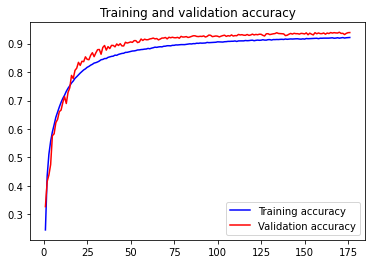

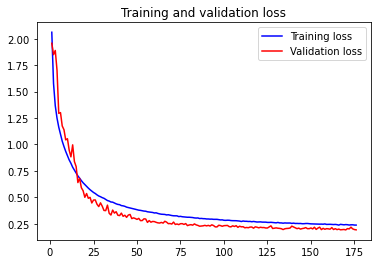

In [4]:
plot_function(history)

In [5]:
test_model = keras.models.load_model("models/"+str(num_classes)+"_Categories_Model.h5")
test_loss, test_acc = test_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

938/938 [==============================] - 5s 5ms/step - loss: 0.1943 - accuracy: 0.9393
Test accuracy: 0.939


In [6]:
os.getcwd()


'c:\\Users\\Brune\\Documents\\GitHub\\Stage\\QuickDraw-Project'

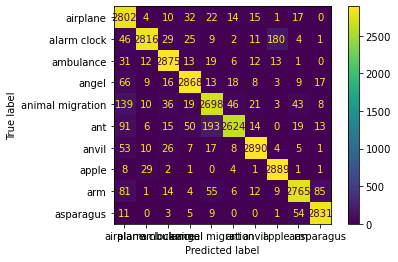

In [12]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
l=os.listdir('Data/'+str(num_classes)+'_Categories/')
li=[x.split('.')[0] for x in l]

predictions = test_model.predict(X_test) 
y_pred = (predictions >= 0.5)
rounded_labels=np.argmax(y_test, axis=1)

matrix = metrics.confusion_matrix(rounded_labels, y_pred.argmax(axis=1))
matrix.diagonal()/matrix.sum(axis=1)
cmd = ConfusionMatrixDisplay(matrix, display_labels=li)
cmd.plot()